In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#filename and number of nodes
files = {'knl_mpi1':1, 'knl_mpi2':2, 'knl_mpi4':4,
         'skl_mpi1':1, 'skl_mpi2':2, 'skl_mpi4':4,
         'p100_mpi1':1, 'p100_mpi2':2, 'p100_mpi4':4,
         'v100_mpi1':1, 'v100_mpi2':2, 'v100_mpi4':4,
         'i5':1
        }

styles = {'knl_mpi1':'go', 'knl_mpi2':'gx', 'knl_mpi4':'gp',
         'skl_mpi1':'bo', 'skl_mpi2':'bx', 'skl_mpi4':'bp',
         'p100_mpi1':'ro', 'p100_mpi2':'rx', 'p100_mpi4':'rp',
         'v100_mpi1':'yo', 'v100_mpi2':'yx', 'v100_mpi4':'yp',
         'i5':'mo'
        }
styles

{'i5': 'mo',
 'knl_mpi1': 'go',
 'knl_mpi2': 'gx',
 'knl_mpi4': 'gp',
 'p100_mpi1': 'ro',
 'p100_mpi2': 'rx',
 'p100_mpi4': 'rp',
 'skl_mpi1': 'bo',
 'skl_mpi2': 'bx',
 'skl_mpi4': 'bp',
 'v100_mpi1': 'yo',
 'v100_mpi2': 'yx',
 'v100_mpi4': 'yp'}

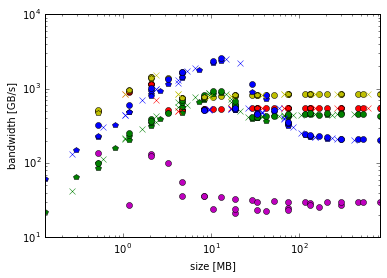

In [105]:
plt.figure()
fig,ax=plt.subplots()
for f, nodes in files.items():
    #read in csv file
    df=pd.read_csv('benchmark_'+f+'.csv', delimiter=' ')
    #add size and get rid of non-relevant columns
    df.insert(0,'size', 8*df['n']*df['n']*df['Nx']*df['Ny']/1e6/nodes)
    bw = df[['n','Nx','Ny','size']]
    bw = bw.assign(axpby = df['size']/1000*3/df['axpby'])
    #compute mean and standard derivation of 'same' groups 
    bw=bw.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
    bw=bw.reset_index(level=['n','Nx','Ny','size'])
    bw=bw.sort_values(by='size')
    bw=bw.reset_index(level=['n','Nx','Ny','size'])
    p=bw['axpby'].plot(ax=ax,style=styles[f],x=bw.loc[:,'size'],y='mean')#,yerr='std',ax=ax)

plt.xlabel('size [MB]')
plt.ylabel('bandwidth [GB/s]')
plt.xscale('log')
plt.yscale('log')
#plt.legend(loc='upper left')
plt.legend().remove()